In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov
import RuleQuality as RQ

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [2]:
#get list of client rules sorted by count
popSize = 10
clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
# clientFilename = "../Data/Sepsis/Best/"

# ldpFilename = "../Results/TEST/ICU_Base_PRIV.csv"
ldpFilename = "../Results/TEST/ICU_Base_TEST.csv"
# ldpFilename = "../Results/Sepsis_Base_TEST.csv"

# ldpFilename = "../Results/ICU_Base_TEST_2.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8


,Rule,Rule Count,Percent of Population
53,"((MET >= 0.000) U[0,0] (death = 0.000))",17,1.0
56,"F[0,0]((BLOOD_UREA_NITROGEN <= 0.000 & CREATIN...",13,1.0
57,"G[0,0]((n_evts <= 0.000 -> LOS >= 0.000))",12,1.0
47,"G[0,0]((hr >= 0.000 & Pulse >= 0.000))",3,0.3
172,"((af >= 0.000) U[0,0] (direct >= 0.000))",3,0.3
...,...,...,...
188,"F[0,0]((HEMOGLOBIN <= 0.000 & O2_Flow <= 0.000))",1,0.1
187,"F[0,0]((dfa >= 0.000 & Mort >= 0.000))",1,0.1
186,"((O2_Flow <= 0.000) U[0,0] (PLATELET_COUNT >= ...",1,0.1
185,"((MET >= 0.000) U[0,0] (PARTIAL_THROMBOPLASTIN...",1,0.1


In [4]:
clientDF.to_csv("Client Rules.csv")

## Load LDP Ruleset

In [5]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
181,"((s24_hr > 0.000) U[0,0] (POTASSIUM < 0.000))",1.0
149,"G[0,0]((BLOOD_UREA_NITROGEN = 0.000 | ICU_Pt_D...",1.0
139,"((death = 0.000) U[0,0] (n_edrk < 0.000))",1.0
527,"F[0,0]((direct > 0.000 & death = 0.000))",1.0
526,"((MAGNESIUM > 0.000) U[0,0] (death > 0.000))",1.0
...,...,...
233,"G[0,0]((Resp = 0.000 | Mort = 0.000))",0.5
232,"((lds > 0.000) U[0,0] (n_edrk > 0.000))",0.5
231,"((af = 0.000) U[0,0] (dfa = 0.000))",0.5
230,"F[0,0]((ICU_Pt_Days > 0.000 & Mort = 0.000))",0.5


## Get Table of Structure Counts - Count of rules above threshold

In [6]:
covDF, countDF, clientTrees = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")

ValueError: too many values to unpack (expected 3)

In [ ]:
covDF

In [ ]:
countDF

## Get number of unique structure types

In [ ]:
structDF = cov.countUniqueStructuresNoVars(clientTrees, ldpTrees)

In [ ]:
structDF

## Compare LDP Rules Found vs the Percent Client Counts 

In [ ]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()


In [ ]:
base = pd.read_csv("../Results/Nonprivate/ICU/Base_CoverageSummaryDF.csv")
base

In [3]:
rules = base["Percentage Found Rules"]
queries = base["Queries"]
covRules = [1.0,1.0,1.0,1.0,1.0,1.0,0.94,0.667,0.56,0.2]

plt.figure(figsize=(12, 7))
plt.title("Rule Coverage Query Analysis")
# plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queries, covRules, label='Improved')
# plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

NameError: name 'base' is not defined

In [ ]:
#Plot Structures
structs = base["Percentage Found Structures"]
covStructs = [1.0,1.0,1.0,1.0,1.0,1.0,1,1,0.955,0.8]

plt.figure(figsize=(12, 7))
plt.title("Structure Coverage Query Analysis")
# plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, structs, label='Baseline')
plt.plot(queries, covStructs, label='Improved')
# plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Structures")
plt.legend()

In [ ]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [0.340425532,0.357142857,0.409090909,0.406779661,0.35,0.393939394,0.409090909]
one = [0.58, 0.475, 0.482758621, 0.433, 0.403846154, 0.4615, 0.45826087]
epsDivQueries = [0.714, 0.75, 0.6210526316, 0.65, 0.6, 0.25, 0.111111111]
epsOnly = [0.45, 0.45, 0.294736842, 0.35, 0.328571429, 0.181818182, 0.272727273]

# epsOnly = [0, 0, 0.394736842, 0.5, 0.428571429, 0.181818182, 0.272727273]

plt.figure(figsize=(12, 7))
plt.title("Comparing Cp Methods- Rule Precision")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')
plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Rule Precision (True / True + Non rules)")
plt.legend()

In [ ]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [16, 10, 18, 24, 16, 13, 18]
one = [25, 19, 14, 13, 13, 12, 11]
epsDivQueries = [5, 3, 4, 4, 3, 1, 1]
epsOnly = [1, 1 ,3, 2, 3, 2, 3]


plt.figure(figsize=(12, 7))
plt.title("Comparing Cp Methods- Total Found Rules")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Total Found Rules")
plt.legend()

In [ ]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [31, 18, 26, 35, 19, 20, 26]
one = [18, 21, 15, 22, 17, 14, 13] 
epsDivQueries = [2, 1, 2, 1, 2, 3, 8]
epsOnly = [3, 2, 5, 3, 5, 9, 9]


plt.figure(figsize=(12, 7))
plt.title("Comparing Cp Methods- Total Non Rules")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Total Non Rules")
plt.legend()

In [ ]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [0.922222222,0.722222222,0.855555556,0.855555556,0.855555556,0.722222222,0.655555556]
one = [0.855555556,0.922222222,0.922222222,0.922222222,0.922222222,0.788888889,0.922222222] 
epsDivQueries = [0.988888889,0.988888889,0.922222222,0.988888889,0.922222222,0.855555556, 0.722222222]
epsOnly = [0.988888889,0.988888889,0.988888889,0.988888889, 0.855555556,0.988888889,0.788888889 ]


plt.figure(figsize=(12, 7))
plt.title("Rule Quality")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Precision")
plt.legend()

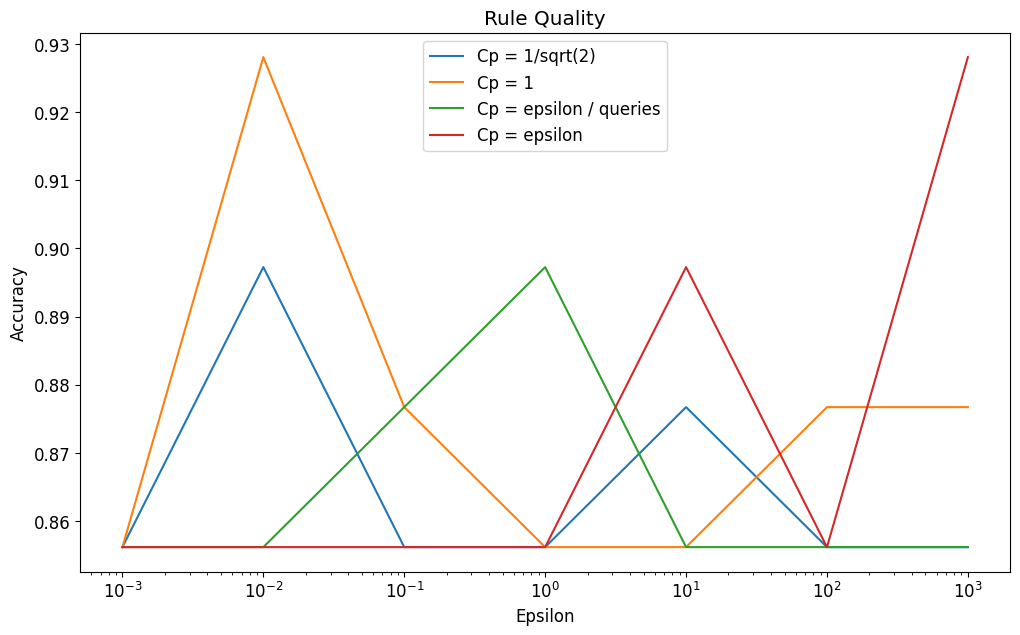

In [7]:
eps = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
basic = [0.856164384,
0.856164384,
0.876712329,
0.856164384,
0.856164384,
0.897260274,
0.856164384]
one = [0.876712329,
0.876712329,
0.856164384,
0.856164384,
0.876712329,
0.928082192,
0.856164384] 
epsDivQueries = [0.856164384,
0.856164384,
0.856164384,
0.897260274,
0.876712329,
0.856164384,
0.856164384]
epsOnly = [0.928082192,
0.856164384,
0.897260274,
0.856164384,
0.856164384,
0.856164384,
0.856164384]


plt.figure(figsize=(12, 7))
plt.title("Rule Quality")
plt.plot(eps, basic, label='Cp = 1/sqrt(2)')
plt.plot(eps, one, label='Cp = 1')
plt.plot(eps, epsDivQueries, label='Cp = epsilon / queries')
plt.plot(eps, epsOnly, label='Cp = epsilon')


plt.xlabel("Epsilon")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Base_CoverageSummaryDF.csv')
df

In [ ]:
df['Epsilon']

In [ ]:
cov.plotQueryAnalysisPrivate(df, "test")

In [ ]:
import RuleQuality as RQ
clientCM = pd.read_csv('../Results/NonPrivate/ICU/Base_Client_CM.csv')
clientCM

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Base_RuleQualitySummaryDF.csv')
df

In [ ]:
RQ.plotPrivatePatientCM(df, clientCM, "test")

## Complexity Analysis

In [ ]:
k = 4 #k-ary tree
h = 17 #height
k**h

In [5]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Coverage/CovSumSmol.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '../Results/Private/ICU/Baseline/Coverage/CovSumSmol.csv'

In [6]:
qDF= df
methods = sorted(list(set(qDF['Cp'])))
epsilons = sorted(list(set(qDF['Epsilon'])))

# plt.figure(figsize=(12, 7))
fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=len(methods))
# plt.title("Rule Summary for " + str(q) + " Queries")
ax_position = 0
for concept in methods:
    # idx = pd.IndexSlice
    # subset = df.loc[idx[[concept], :],
    #                 ['Found Rules', 'Non Rules']]
    subset = qDF.loc[qDF['Cp'] == concept][['Found Rules', 'Non Rules']]
    # print(subset.info())
    # subset = subset.groupby(
    #     subset.index.get_level_values('datetime').year).sum()

    # ax = subset.plot(kind="bar", stacked=True, colormap="Blues",ax=axes[ax_position])
    ax = subset.plot(kind="bar", stacked=True, ax=axes[ax_position])


    if concept == methods[0]:
        ax.set_ylabel("Total Rules")
    if concept == methods[-1]:
        ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

    ax.set_title("Cp: " + concept)
    ax.set_xlabel("Epsilon")
    # ax.set_title("Concept \"" + concept + "\"", fontsize=30, alpha=1.0)
    # ax.set_ylabel("Total Rules", fontsize=30)
    # ax.set_xlabel("Concept \"" + concept + "\"", fontsize=30, alpha=0.0)

    ax.set_ylim(0, 80)
    # ax.set_yticks(range(0, 9000, 1000))
    # ax.set_yticklabels(labels=range(0, 9000, 1000), rotation=0,
    #                    minor=False, fontsize=28)
    ax.set_xticklabels(labels=epsilons, rotation=0,minor=False)
    handles, labels = ax.get_legend_handles_labels()
    ax_position += 1

NameError: name 'df' is not defined

In [ ]:
#Plot percentage found rules
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Percentage Found Client Rules")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Percentage Found Rules']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Percentage Found Client Client Rules")
plt.xscale('log')
plt.legend()

In [ ]:
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Rule Precision")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Rule Precision']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Rule Precision")
plt.xscale('log')
plt.legend()

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Rule Quality/RuleQualitySumSmol.csv')

clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_CM.csv")
clientCM

In [ ]:
qDF = df
metric = "Accuracy"

plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='..', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='..', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

In [ ]:
qDF = df
metric = "Patient Precision"
clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_Patient_CM.csv")


plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='dotted', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='dotted', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Coverage/CovSumSmol.csv')
df

In [ ]:
qDF= df
methods = sorted(list(set(qDF['Cp'])))
epsilons = sorted(list(set(qDF['Epsilon'])), reverse=True)


# plt.figure(figsize=(12, 7))
fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=len(methods))
# plt.title("Rule Summary for " + str(q) + " Queries")
ax_position = 0
for concept in methods:
    # idx = pd.IndexSlice
    # subset = df.loc[idx[[concept], :],
    #                 ['Found Rules', 'Non Rules']]
    subset = qDF.loc[qDF['Cp'] == concept][['Found Rules', 'Non Rules']]
    # print(subset.info())
    # subset = subset.groupby(
    #     subset.index.get_level_values('datetime').year).sum()

    # ax = subset.plot(kind="bar", stacked=True, colormap="Blues",ax=axes[ax_position])
    ax = subset.plot(kind="bar", stacked=True, ax=axes[ax_position])


    if concept == methods[0]:
        ax.set_ylabel("Total Rules")
    if concept == methods[-1]:
        ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

    ax.set_title("Cp: " + concept)
    ax.set_xlabel("Epsilon")
    # ax.set_title("Concept \"" + concept + "\"", fontsize=30, alpha=1.0)
    # ax.set_ylabel("Total Rules", fontsize=30)
    # ax.set_xlabel("Concept \"" + concept + "\"", fontsize=30, alpha=0.0)

    ax.set_ylim(0, 80)
    # ax.set_yticks(range(0, 9000, 1000))
    # ax.set_yticklabels(labels=range(0, 9000, 1000), rotation=0,
    #                    minor=False, fontsize=28)
    ax.set_xticklabels(labels=epsilons, rotation=0,minor=False)
    handles, labels = ax.get_legend_handles_labels()
    ax_position += 1

In [ ]:
#Plot percentage found rules
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Percentage Found Client Rules")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Percentage Found Rules']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Percentage Found Client Client Rules")
plt.xscale('log')
plt.legend()

In [ ]:
qDF = df

# Plot Rules
plt.figure(figsize=(12, 7))
plt.title("Rule Precision")

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    rls = miniDF['Rule Precision']
    plt.plot(eps, rls, label="Cp: " + method)

plt.xlabel("Epsilon")
plt.ylabel("Rule Precision")
plt.xscale('log')
plt.legend()

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Rule Quality/RuleQualitySumSmol.csv')

clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_CM.csv")
clientCM

In [ ]:
qDF = df
metric = "Accuracy"

plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='..', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='..', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

In [ ]:
qDF = df
metric = "Patient Precision"
clientCM = pd.read_csv("../Results/Client/Baseline/10 Clients/Client_Patient_CM.csv")


plt.figure(figsize=(12, 7))
plt.title(metric)

for method in sorted(list(set(qDF['Cp']))):
    miniDF = qDF.loc[qDF['Cp'] == method]
    eps = miniDF['Epsilon']
    met = miniDF[metric]
    plt.plot(eps, met, label="Cp: " + method)

if metric == "Patient Accuracy":
    plt.axhline(y=clientCM["Accuracy"].item(), color='r', linestyle='dotted', label='Client ' + metric)
elif metric == "Patient Precision":
    plt.axhline(y=clientCM["Precision"].item(), color='r', linestyle='dotted', label='Client ' + metric)
else:
    plt.axhline(y=clientCM[metric].item(), color='r', linestyle='dotted', label='Client ' + metric)
plt.xlabel("Epsilon")
plt.ylabel(metric)
plt.xscale('log')
plt.legend()

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Coverage/CoverageSummaryDF.csv')
df

In [ ]:
cps = sorted(list(set(df['Cp'])))
lambdas = sorted(list(set(df['Lambda'])))
epsilons = sorted(list(set(df['Epsilon'])))

maxFR = max(df['Found Rules'])
maxNR = max(df['Non Rules'])
maxRules = maxFR + maxNR

fig, axes = plt.subplots(figsize=(20, 20), nrows=len(cps), ncols=len(lambdas))
row = 0
col = 0
for c in cps:
    col = 0
    for l in lambdas:
        subset = df.loc[df['Cp'] == c]
        subset = subset.loc[df['Lambda'] == l][['Found Rules', 'Non Rules']]

        ax = subset.plot(kind="bar", stacked=True, ax=axes[row, col])

        ax.set_ylabel("Total Rules")
        ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

        ax.set_title("Cp: " + c + "; Lambda: " + l)
        ax.set_xlabel("Epsilon")
        ax.set_ylim(0, maxRules)

        ax.set_xticklabels(labels=epsilons, rotation=0, minor=False)
#         handles, labels = ax.get_legend_handles_labels()
        col += 1
    row += 1
fig.tight_layout()
    

In [ ]:
df = pd.read_csv('../Results/Private/ICU/Baseline/Coverage/CoverageSummaryDF.csv')
df

In [ ]:
def plotQueryAnalysisPrivate(df, save, value):
    cps = sorted(list(set(df['Cp'])))
    lambdas = sorted(list(set(df['Lambda'])))

    plt.figure(figsize=(12, 7))
    plt.title(value)
    for cp in cps:
        for l in lambdas:
            miniDF = df.loc[df['Cp'] == cp]
            miniDF = miniDF.loc[df['Lambda'] == l]
            eps = miniDF['Epsilon']
            rls = miniDF[value]
#             plt.plot(eps, rls, label="Cp: " + cp + "; Lambda: " + l)
            sns.lineplot(data=miniDF, x="Epsilon", y=value, label="Cp: " + cp + "; Lambda: " + l)

    plt.xlabel("Epsilon")
    plt.ylabel(value)
    plt.xscale('log')
    plt.legend()
#     save = save.replace(".", "-")
#     plt.savefig(save + value)
#     plt.show()

In [ ]:
plotQueryAnalysisPrivate(df, '', 'Found Rules')
plotQueryAnalysisPrivate(df, '', 'Rule Precision')

In [ ]:
df = pd.read_csv('../Results/AveragedCoverageSummaryDF.csv')
df

In [ ]:
def summaryPrivRules(df, save):
    cps = sorted(list(set(df['Cp'])))
    lambdas = sorted(list(set(df['Lambda'])))
    epsilons = sorted(list(set(df['Epsilon'])), reverse=True)

    maxFR = max(df['Found Rules'])
    maxNR = max(df['Non Rules'])
    maxRules = maxFR + maxNR

    fig, axes = plt.subplots(figsize=(20, 20), nrows=len(cps), ncols=len(lambdas))
    row = 0
    col = 0
    for c in cps:
        col = 0
        for l in lambdas:
            cpdf = df.loc[df['Cp'] == c]
            subset = cpdf.loc[df['Lambda'] == l][['Found Rules', 'Non Rules']]
            FRErr = cpdf.loc[df['Lambda'] == l]['Found Rules Std']
            NRErr = cpdf.loc[df['Lambda'] == l]['Non Rules Std']

            ax = subset.plot(kind="bar", stacked=True, yerr=[FRErr, NRErr], ax=axes[row, col])

            ax.set_ylabel("Total Rules")
            ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

            ax.set_title("Cp: " + c + "; Lambda: " + l)
            ax.set_xlabel("Epsilon")
            ax.set_ylim(0, maxRules)

            ax.set_xticklabels(labels=epsilons, rotation=0, minor=False)
            handles, labels = ax.get_legend_handles_labels()
            col += 1
        row += 1
    fig.tight_layout()
#     save = save.replace(".", "-")
#     fig.savefig(save + "Summary_Rules_Nonrules")
    fig.show()
    
summaryPrivRules(df, save=None)

In [ ]:
df = pd.read_csv('../Results/AveragedCoverageSummaryDF smol.csv')
df

In [ ]:
def plotQueryAnalysisPrivate(df, save, value):
    cps = sorted(list(set(df['Cp'])))
    lambdas = sorted(list(set(df['Lambda'])))

    plt.figure(figsize=(12, 7))
    plt.title(value)
    for cp in cps:
        for l in lambdas:
            miniDF = df.loc[df['Cp'] == cp]
            miniDF = miniDF.loc[df['Lambda'] == l]
            # eps = miniDF['Epsilon']
            # rls = miniDF[value]
            #             plt.plot(eps, rls, label="Cp: " + cp + "; Lambda: " + l)
            sns.lineplot(data=miniDF, x="Epsilon", y=value, label="Cp: " + cp + "; Lambda: " + l)

    plt.xlabel("Epsilon")
    plt.ylabel(value)
    plt.xscale('log')
    plt.legend()

#     save = save.replace(".", "-")
#     plt.savefig(save + value)
    plt.show()

In [ ]:
plotQueryAnalysisPrivate(df, save=None, value='Found Rules')
# cov.plotQueryAnalysisPrivate(df, save=filepath,value='Percentage Found Structures')
# cov.plotQueryAnalysisPrivate(df, save=filepath,value='Rule Precision')
# cov.plotQueryAnalysisPrivate(df, save=filepath,value='Structure Precision')
# cov.plotQueryAnalysisPrivate(df, save=filepath,value='Found Rules')
plotQueryAnalysisPrivate(df, save=None,value='Non Rules')